# Tawakkalna App Face Recognition 

# Appendix:
- Click on the links:
* <a href= #Objective> Objective</a>
* <a href= #Import> Imports Libraries</a>
* <a href= #ReadData> Read Data</a>
* <a href = #DataSplitting>Data Splitting </a>
* <a href= #LogisticRegression>Logistic Regression </a>
* <a href= #RandomForest>Random Forest </a>
* <a href = #K-NNClassifier>K-NN Classifier</a>
* <a href= #ConvolutionalNeuralNetwork(CNN)>Convolutional Neural Network (CNN)</a>
* <a href= #ReshapeforCNN>Reshape for CNN</a>
* <a href= #deeplearningmodeltensorflowmodel>Deep Learning Tensorflow Model</a>
* <a href= #LabelEncoding>Label Encoding</a>
* <a href= #ComparisonoftheLearningMethods>Comparison of the Learning Methods</a>
* <a href= #WebcamFacialRecognitionSystem>WebcamFacialRecognitionSystem</a>
* <a href= #Getareferencetothewebcamstream>Get a Reference to The Webcam Stream</a>
* <a href= #loadingpicturessamples> Loading Pictures Samples</a>



# <a name= 'Objective'>Objective </a>

### Tawakkalna App was developed by the Saudi Data and Artificial Intelligence Authority (SDAIA) to assist the government in combating Covid-19. In total, Tawakkalna App offers 44 services to Saudi government ministries such as the Ministry of Health, Hajj, and Umra. Through the use of Facial Recognition, this project intends to ensure the real identity of Tawlakna users by checking if the picture matches the person's national ID. This is a security feature that can be used to recognize people's real identities in crowded areas such as Hajj and Umrah , where it is otherwise difficult to identify them.


# <a name= 'Import'>Imports Libraries </a>

In [1]:

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from simanneal import Annealer
import numpy as np;
import cv2;
import face_recognition;

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("/Users/ahad/Downloads/FASESDATA"))

['olivetti_faces_target.npy', 'olivetti_faces.npy']


In [2]:
pip install keras

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install simanneal

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# <a name= 'ReadData'>Reading Data </a>

In [2]:
pics = np.load("/Users/ahad/Downloads/FASESDATA/olivetti_faces.npy")
labels = np.load("/Users/ahad/Downloads/FASESDATA/olivetti_faces_target.npy")

In [3]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


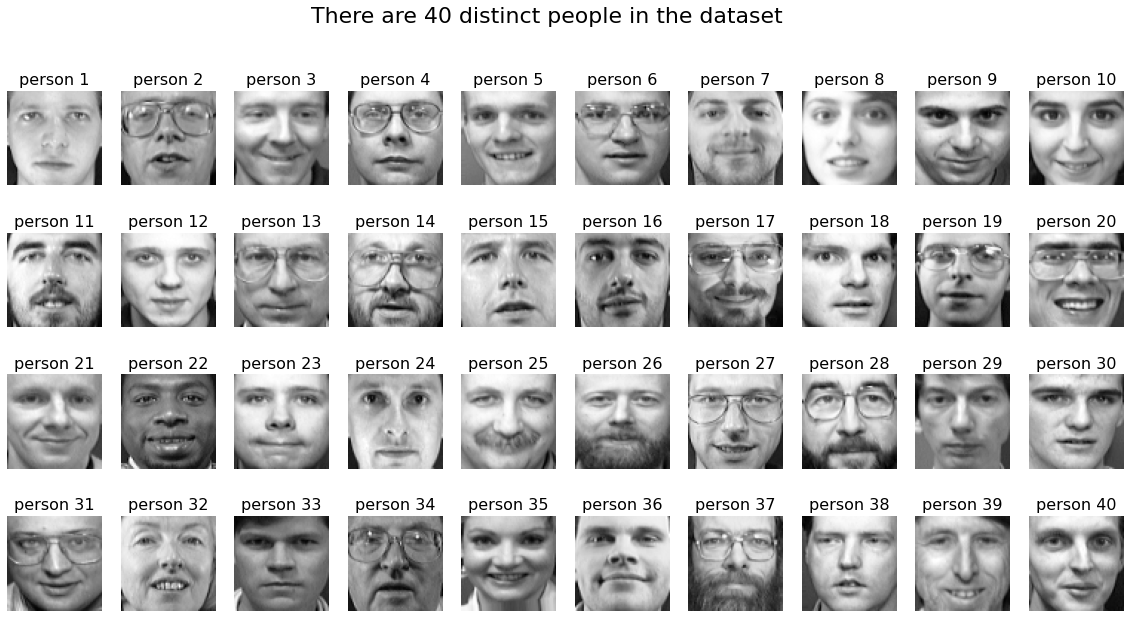

In [4]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()

 # <a name= 'DataSplitting'>Data Splitting </a>

In [5]:
Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


In [7]:

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [8]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []


 # <a name= 'LogisticRegression'>Logistic Regression </a>

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

LR_accuracy is % 96.25



 # <a name= 'RandomForest'>Random Forest </a>

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

RF_accuracy is % 93.75



 # <a name= 'K-NNClassifier'>K-NN Classifier</a>

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

Knn_accuracy is % 91.25



 # <a name= 'ConvolutionalNeuralNetwork(CNN)'>Convolutional Neural Network (CNN)</a>


# <a name= 'ReshapeforCNN'>Reshape for CNN</a>

In [12]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)



 # <a name= 'LabelEncoding'>Label Encoding</a>

In [13]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

y_train_ = to_categorical(y_train, num_classes = 40) # 40 distinct people
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)



 # <a name= 'deeplearningmodeltensorflowmodel'>Deep Learning Tensorflow Model</a>

In [14]:
from tensorflow.keras.optimizers import RMSprop

In [15]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 45
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )


Epoch 1/45
16/16 - 4s - loss: 4.7806 - accuracy: 0.0094 - val_loss: 3.6890 - val_accuracy: 0.0250 - lr: 0.0010 - 4s/epoch - 259ms/step
Epoch 2/45
16/16 - 3s - loss: 3.6920 - accuracy: 0.0125 - val_loss: 3.6904 - val_accuracy: 0.0250 - lr: 0.0010 - 3s/epoch - 198ms/step
Epoch 3/45
16/16 - 3s - loss: 3.6910 - accuracy: 0.0219 - val_loss: 3.6920 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 198ms/step
Epoch 4/45
16/16 - 3s - loss: 3.6927 - accuracy: 0.0312 - val_loss: 3.6919 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 199ms/step
Epoch 5/45
16/16 - 3s - loss: 3.6882 - accuracy: 0.0344 - val_loss: 3.6909 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 198ms/step
Epoch 6/45
16/16 - 3s - loss: 3.6875 - accuracy: 0.0406 - val_loss: 3.6879 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 199ms/step
Epoch 7/45
16/16 - 3s - loss: 3.6516 - accuracy: 0.0469 - val_loss: 3.6508 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 3s/epoch - 215ms/step
Epoch 8/45
16/16 - 4s - loss: 3.531

In [16]:
y_test.shape

(80, 1)

In [17]:
x_test.shape

(80, 64, 64, 1)

In [18]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test,pred )

0.975

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        36050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 50)        0

In [20]:
Cnn_accuracy =round (accuracy_score(y_test,pred )*100,2)

print("Cnn_accuracy is %", Cnn_accuracy)

list_names.append("CNN")
list_accuracy.append(Cnn_accuracy)

Cnn_accuracy is % 97.5


In [21]:
# Plot the loss and accuracy curves for training and validation 
val_accuracy = history.history['val_accuracy']

accuracy = []
num_of_epochs = []

pred = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test,pred )

for i in range(1,epoch,4):
    accuracy.append(round(100*val_accuracy[i],3))
    num_of_epochs.append(i)

trace1 = go.Scatter(y =accuracy, x = num_of_epochs, mode = "lines")
data = [trace1]
layout = dict(title = 'CNN Accuracy',
              autosize=False,
              width=800,
              height=500,
              yaxis= dict(title= 'Accuracy (%)',gridwidth=2, gridcolor='#bdbdbd'),
              xaxis= dict(title= 'Number of Epochs',gridwidth=2, gridcolor='#bdbdbd'),
              font=dict(size=14)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

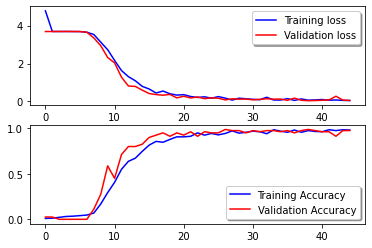

In [22]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.savefig('Resl.png', transparent=True)

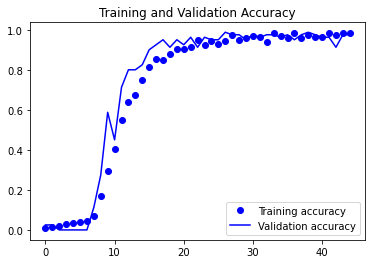

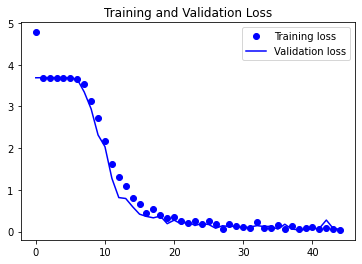

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('Result.png')

In [24]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (10,10),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (10,10),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 45
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )


Epoch 1/45
16/16 - 7s - loss: 8.2828 - accuracy: 0.0094 - val_loss: 3.6907 - val_accuracy: 0.0250 - lr: 0.0010 - 7s/epoch - 417ms/step
Epoch 2/45
16/16 - 7s - loss: 3.6965 - accuracy: 0.0250 - val_loss: 3.6917 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 7s/epoch - 414ms/step
Epoch 3/45
16/16 - 6s - loss: 3.6897 - accuracy: 0.0156 - val_loss: 3.6933 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 6s/epoch - 404ms/step
Epoch 4/45
16/16 - 6s - loss: 3.6892 - accuracy: 0.0250 - val_loss: 3.6941 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 6s/epoch - 390ms/step
Epoch 5/45
16/16 - 6s - loss: 3.7049 - accuracy: 0.0406 - val_loss: 3.7026 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 6s/epoch - 384ms/step
Epoch 6/45
16/16 - 6s - loss: 3.6949 - accuracy: 0.0219 - val_loss: 3.7024 - val_accuracy: 0.0000e+00 - lr: 0.0010 - 6s/epoch - 378ms/step
Epoch 7/45
16/16 - 6s - loss: 3.7529 - accuracy: 0.0281 - val_loss: 3.7050 - val_accuracy: 0.0250 - lr: 0.0010 - 6s/epoch - 395ms/step
Epoch 8/45
16/16 - 6s - loss: 3.689


 # <a name= 'ComparisonoftheLearningMethods'>Comparison of the Learning Methods</a>

In [25]:
list_names

['Logistic Regression', 'Random Forest', 'KNN', 'CNN']

In [26]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,KNN,91.25
1,Random Forest,93.75
2,Logistic Regression,96.25
3,CNN,97.50


In [27]:
trace1 = go.Bar(x = df.iloc[:,0].tolist(), y = df.iloc[:,1].tolist())

data1 = [trace1]
layout1 = go.Layout(
    title='Comparison of the Learning Methods',
    xaxis=dict(titlefont=dict(size=16)),
    yaxis=dict(title='ACCURACY (%)',gridwidth=1, gridcolor='#bdbdbd', range=[89, 99]),
    font=dict(size=16),
    bargap = 0.7,
    barmode='group')

fig = go.Figure(data=data1, layout=layout1)
py.iplot(fig, filename='grouped-bar')

 # <a name= 'WebcamFacialRecognitionSystem'>Webcam FacialRecognition System</a>


 # <a name= 'Getareferencetothewebcamstream'>Get a Reference to The Webcam Stream</a>

In [25]:
video_capture = cv2.VideoCapture(0);

 
# <a name= 'loadingpicturessamples'> Loading Pictures Samples</a>

In [26]:
k_faisal= face_recognition.load_image_file('/Users/ahad/Desktop/king-faisal.jpg');
m_saad= face_recognition.load_image_file('/Users/ahad/Desktop/Saad-Algarni.jpeg');
k_salman= face_recognition.load_image_file('/Users/ahad/Desktop/king-salman.jpg');
mbs= face_recognition.load_image_file('/Users/ahad/Desktop/Prince-Mohammed.jpeg');


#### Now to teach the machine to recognize the unique face encodings inside these images:

In [27]:
faisal_face_encoding = face_recognition.face_encodings(k_faisal)[0];
saad_face_encoding = face_recognition.face_encodings(m_saad)[0];
salman_face_encoding = face_recognition.face_encodings(k_salman)[0];
mbs_face_encoding = face_recognition.face_encodings(mbs)[0];

####  We will now create arrays of known face encodings and their names:

In [28]:
known_face_encodings = [faisal_face_encoding, saad_face_encoding,salman_face_encoding, mbs_face_encoding];
known_face_names = ['King Faisal', ' Saad Algarni','King Salman','Prince Mohammed bin Salman'];

####  Now, we shall loop over every image frame captured by the webcam video feed and apply the operations necessary to detect and recognize faces:

In [ ]:
while True:

    ret, frame = video_capture.read();

    # Converting the frame from OpenCV's BGR format to the RGB format
    rgb_frame = frame[:, :, ::-1];

    # Finding the face locations and encodings in each frame
    face_locations = face_recognition.face_locations(rgb_frame);
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations);

    # Now to loop through each face in this frame
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

        # Checking if the face is a match for known faces
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding);

        name = 'Unknown';

        # Use the known face with the smallest vector distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding);
        best_match_index = np.argmin(face_distances);

        if matches[best_match_index]:
            name = known_face_names[best_match_index];

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 0), 2);

        # Draw a label with the name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (255, 0, 0), cv2.FILLED);
        font = cv2.FONT_HERSHEY_DUPLEX;
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1);

    # Display the image
    cv2.imshow('Video', frame);

    # Hit 'q' on the keyboard to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break;

#### Finally, we will need to release the handle to the webcam and destroy all OpenCV windows as soon as the ‘q’ button is pressed:

In [ ]:
video_capture.release();
cv2.destroyAllWindows();